In [2]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2025-04-06 11:07:56.049360: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-06 11:07:56.160338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-06 11:07:56.201500: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-06 11:07:56.420482: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.17.0
Notebook last run (end-to-end): 2025-04-06 11:08:01.095555


Create Data

In [3]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [4]:
#Check out the feature
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


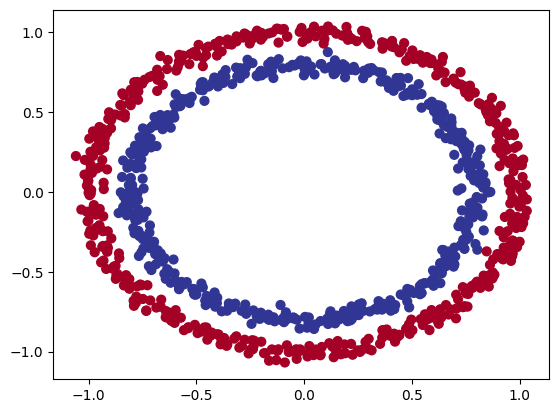

In [7]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=40)

In [8]:
#check the shape of the data
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [10]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Steps in modeling

In [11]:
#set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(X, y, epochs=5)

I0000 00:00:1743937682.563165    7309 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.


Epoch 1/5


I0000 00:00:1743937683.012108    7309 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743937683.012240    7309 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743937683.035448    7309 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743937683.035488    7309 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743937683.035507    7309 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

 1/32 [..............................] - ETA: 1:55 - loss: 5.3956 - accuracy: 0.4062

2025-04-06 11:08:08.060727: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90701
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
I0000 00:00:1743937688.156071   36356 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


32/32 [==============================] - 4s 5ms/step - loss: 4.3379 - accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 4.1323 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 3.9760 - accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 3.7935 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 3.6638 - accuracy: 0.4720


In [12]:
#Poor performance acc-50% means basically guessing
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4940


[0.6931504607200623, 0.49399998784065247]

In [13]:
#set random seed
tf.random.set_seed(42)

#Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_2 = model_2.fit(X, y, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


In [14]:
#Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 3.2735 - accuracy: 0.4830


[3.2734758853912354, 0.4830000102519989]

    Improving model

In [15]:
#set random seed
tf.random.set_seed(42)

#Create model 3 layers 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#Fit the model
history_3 = model_3.fit(X, y, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

In [16]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # create X values we are going to make predictions on
  x_in = np.c_[xx.ravel(), yy.ravel()] 

  #MAke predictions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if model.output_shape[-1] > 1:
    # If so, find the class with the highest probability
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(np.max(y_pred,axis=1)).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, s=40)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


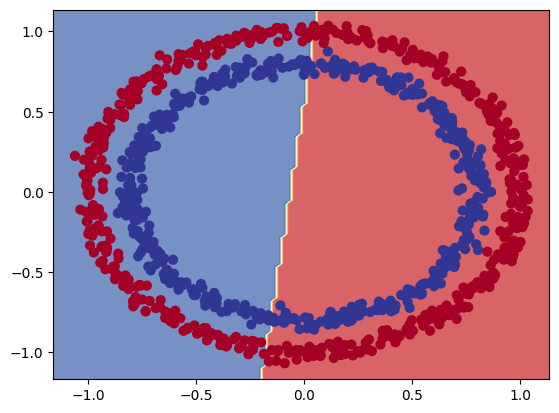

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

This model works for line problems, lets check it in regression case

In [18]:
#set random seed
tf.random.set_seed(42)

#create regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

#Split the data into training and test sets
X_reg_train = X_regression[:150]
y_reg_train = y_regression[:150]
X_reg_test = X_regression[150:]
y_reg_test = y_regression[150:]

Fit model to regression data

In [20]:
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1398, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1381, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1370, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py", line 1147, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model was compiled for binary problems, lest change it

In [22]:
#Replicate model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


5/5 [==============================] - 1s 5ms/step - loss: 560.9261 - mae: 560.9261
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 434.7118 - mae: 434.7118
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 315.2813 - mae: 315.2813
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 192.7655 - mae: 192.7655
Epoch 5/100
1/5 [=====>........................] - ETA: 0s - loss: 111.8534 - mae: 111.8534

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


5/5 [==============================] - 0s 5ms/step - loss: 72.1519 - mae: 72.1519
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 78.9195 - mae: 78.9195
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 89.8855 - mae: 89.8855
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 58.5629 - mae: 58.5629
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 48.4723 - mae: 48.4723
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 54.2410 - mae: 54.2410
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 42.6000 - mae: 42.6000
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 47.2559 - mae: 47.2559
Epoch 13/100
5/5 [==============================] - 0s 4ms/step - loss: 42.8686 - mae: 42.8686
Epoch 14/100
5/5 [==============================] - 0s 4ms/step - loss: 42.4564 - mae: 42.4564
Epoch 15/100
5/5 [==============================] - 0s 4ms/step - l

Visualize the model

2/2 [==============================] - 0s 3ms/step


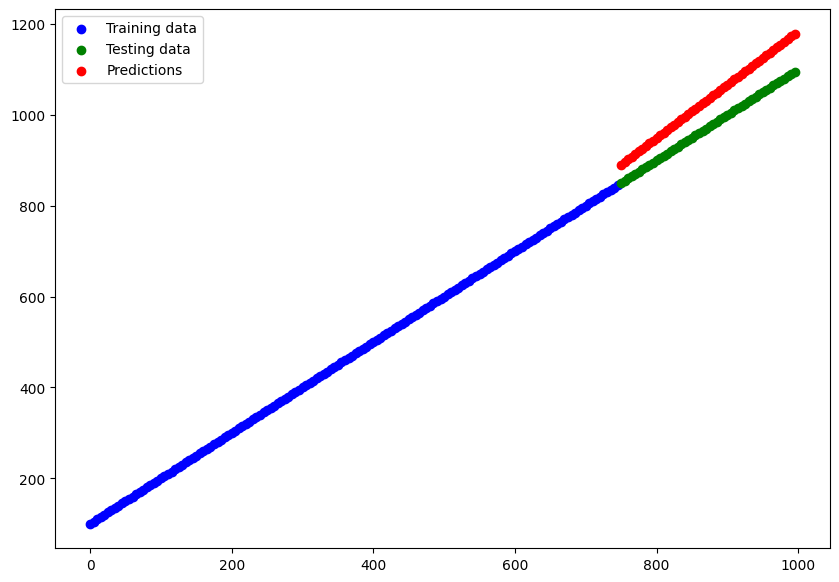

In [23]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend()

Non linearity!!

In [24]:
#set random seed
tf.random.set_seed(42)

#Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="linear"),
    tf.keras.layers.Dense(1) #output layer
])

#Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#Fit the model
history_4 = model_4.fit(X, y, epochs=100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


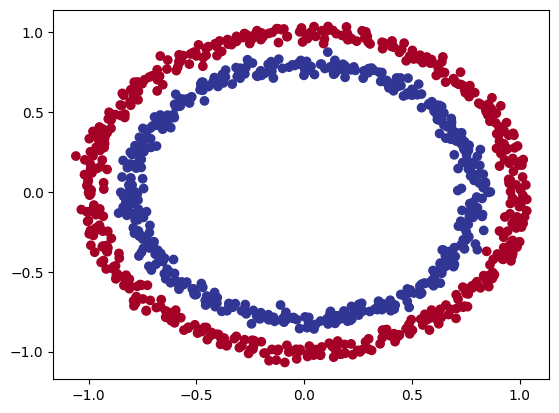

In [25]:
#Check our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


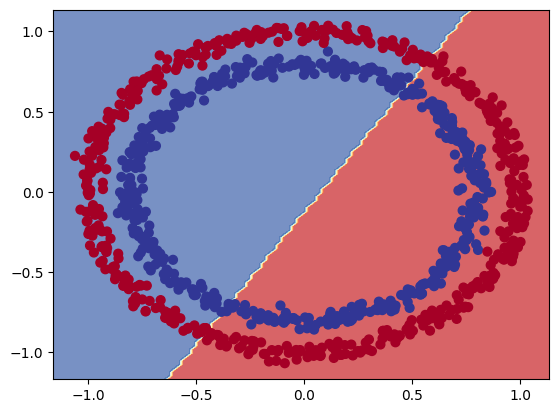

In [26]:
#Check the models decision boundary
plot_decision_boundary(model_4, X, y)

In [27]:
#set random seed
tf.random.set_seed(42)

#Create a model with non-linearity
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

#Compile the model
model_5.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

#Fit the model
history_5 = model_5.fit(X, y, epochs = 100, verbose=1)

Epoch 1/100


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


11/32 [=========>....................] - ETA: 0s - loss: 1.8051 - accuracy: 0.4858 

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


32/32 [==============================] - 1s 6ms/step - loss: 1.5149 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1708 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.9621 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8709 - accuracy: 0.4110
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8270 - accuracy: 0.3790
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8018 - accuracy: 0.3990
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7845 - accuracy: 0.4190
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7719 - accuracy: 0.3960
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7613 - accuracy: 0.3920
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7530 - accuracy: 0.3390
Epoch 11/100
32/32 [=

In [28]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.2382 - accuracy: 0.9680


[0.23819759488105774, 0.9679999947547913]

313/313 [==============================] - 1s 2ms/step
doing binary classification


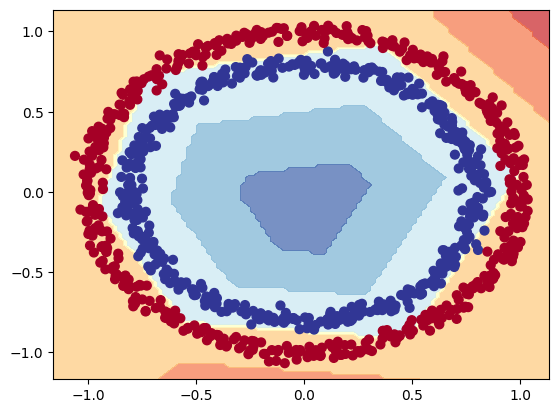

In [29]:
plot_decision_boundary(model_5, X, y)

In [30]:
#set random seed
tf.random.set_seed(42)

#Create a model with non-linearity
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer
])

#Compile the model
model_6.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

#Fit the model
history_6 = model_6.fit(X, y, epochs = 100, verbose=0)

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

In [31]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9970


[0.007089171092957258, 0.996999979019165]

313/313 [==============================] - 0s 1ms/step
doing binary classification


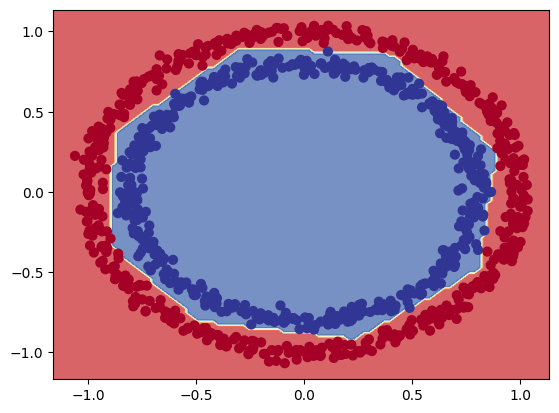

In [32]:
plot_decision_boundary(model_6, X, y)

Checking out activation functions

In [33]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

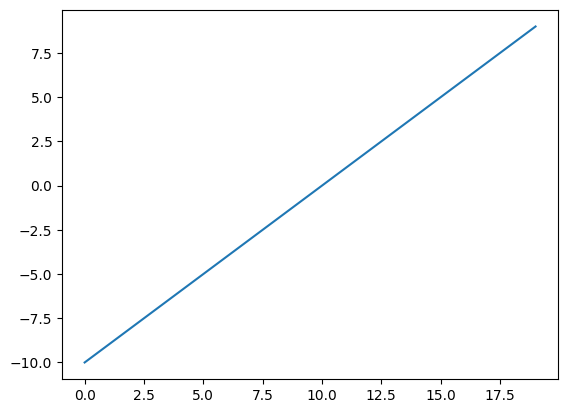

In [34]:
plt.plot(A)

Recreate sigmoid

In [35]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

Text(0, 0.5, 'sigmoid[x]')

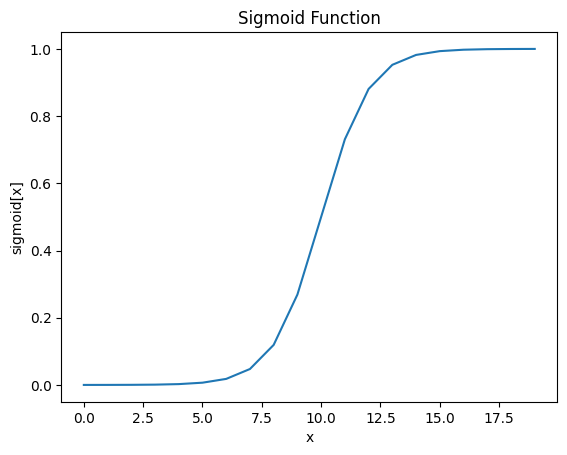

In [36]:
plt.plot(sigmoid(A))
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid[x]")

In [37]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

Text(0, 0.5, 'relu[x]')

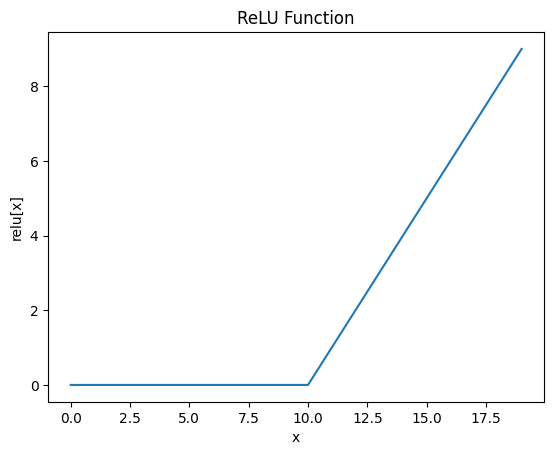

In [38]:
plt.plot(relu(A))
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("relu[x]")

In [39]:
#what about tf linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [40]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [41]:
#split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [42]:
#set random seed
tf.random.set_seed(42)

#create a model witg split data
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer
])
#Compile the model  
model_8.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
#Fit the model
history_8 = model_8.fit(X_train, y_train, epochs = 25, verbose=0)


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

In [43]:
loss,accuracy = model_8.evaluate(X_test, y_test)
print(f"Loss on test set: {loss}")
print(f"Accuracy on test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.8300
Loss on test set: 0.5672401189804077
Accuracy on test set: 83.00%


313/313 [==============================] - 1s 2ms/step
doing binary classification


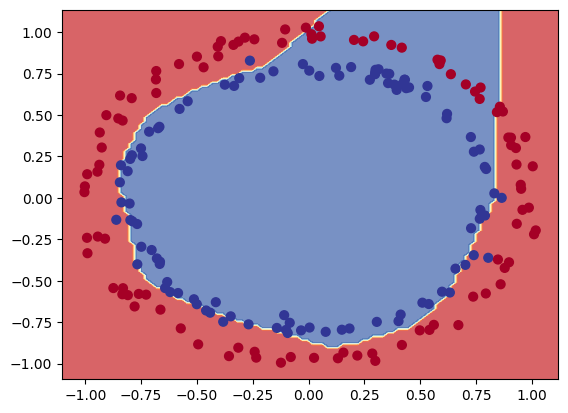

In [44]:
plot_decision_boundary(model_8, X_test, y_test)

Compare train vs test data evaluation

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


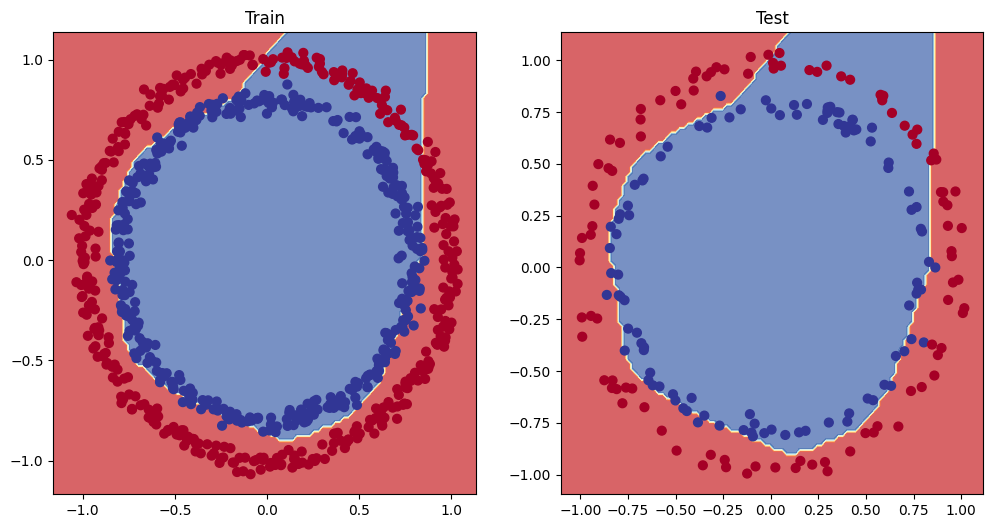

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

Plot the losses


In [46]:
# Check the model's predictions
pd.DataFrame(history_8.history).head(25)

,loss,accuracy
0,0.695354,0.48625
1,0.694102,0.48875
2,0.693146,0.49625
3,0.692654,0.50875
4,0.690597,0.50750
5,0.688216,0.49750
6,0.686769,0.50875
7,0.685124,0.52625
8,0.683898,0.52250
9,0.682171,0.55500


<Axes: title={'center': 'Model 8 loss curves'}, xlabel='Epochs'>

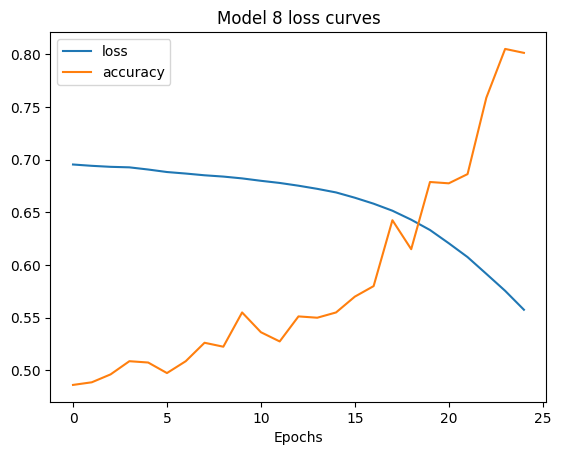

In [47]:
#plot the loss curves
pd.DataFrame(history_8.history).plot(
    title="Model 8 loss curves",
    xlabel="Epochs"
)

Finding the best learning rate

In [76]:
#set random seed
tf.random.set_seed(42)
#Create a model same as model 8
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer
])

#compile the model
model_9.compile(optimizer='Adam', loss="binary_crossentropy", metrics=['accuracy'])

#set a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fit the model
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

25/25 [==============================] - 1s 4ms/step - loss: 0.7010 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
 1/25 [>.............................] - ETA: 0s - loss: 0.7042 - accuracy: 0.5625

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


25/25 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.5100 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6995 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6987 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6963 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.4988 - lr: 2.5119e-04
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6942 - a

<Axes: xlabel='epochs'>

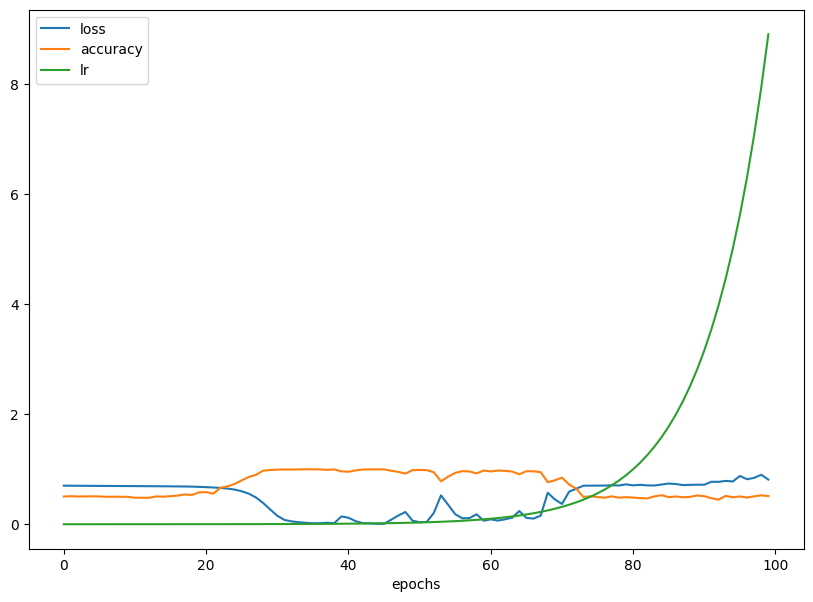

In [77]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel = "epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

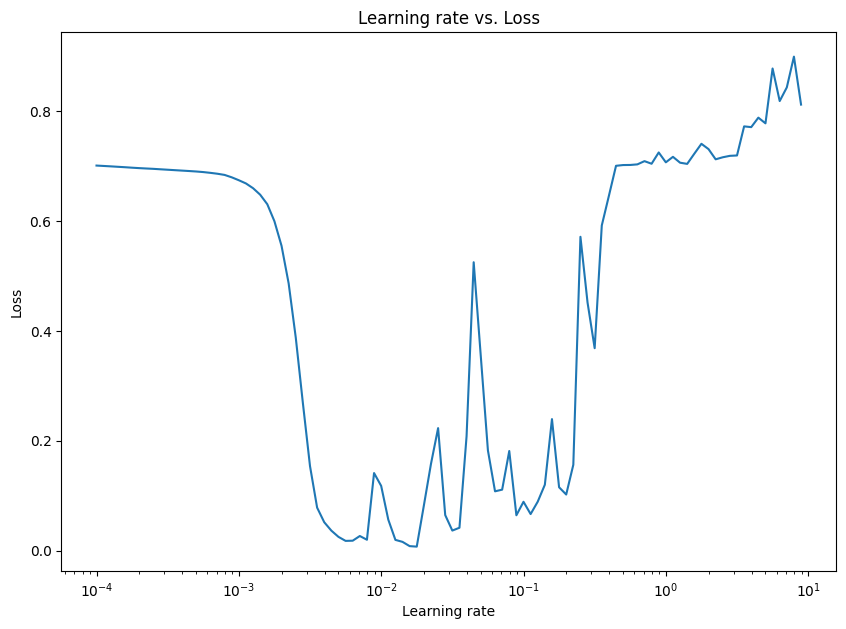

In [78]:
#plot lr vs the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
#Create a model with optimal learning rate =.003

#set random seed
tf.random.set_seed(42)
#Create a model same as model 8
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer
])

#compile the model
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=['accuracy'])

#fit the model
history_10 = model_10.fit(X_train, y_train, epochs=30)

Epoch 1/30


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

25/25 [==============================] - 1s 4ms/step - loss: 0.6978 - accuracy: 0.4850
Epoch 2/30
 1/25 [>.............................] - ETA: 0s - loss: 0.6899 - accuracy: 0.5312

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


25/25 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.5025
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.5225
Epoch 4/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6837 - accuracy: 0.5650
Epoch 5/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5375
Epoch 6/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.6125
Epoch 7/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.7038
Epoch 8/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6039 - accuracy: 0.8112
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.8637
Epoch 10/30
25/25 [==============================] - 0s 4ms/step - loss: 0.4796 - accuracy: 0.9250
Epoch 11/30
25/25 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.9737
Epoch 12/30
25/25 [==========

In [86]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 1.0000


[0.02348705567419529, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 2ms/step
doing binary classification


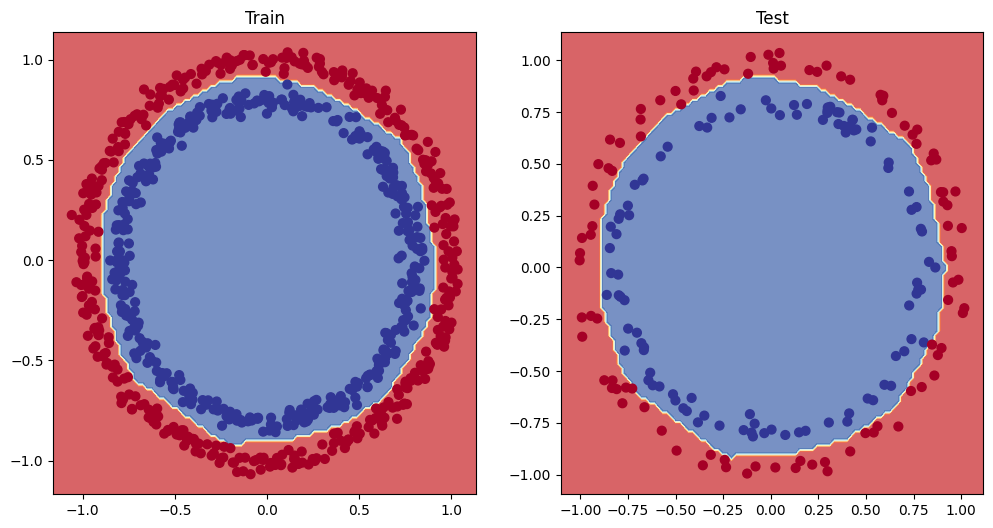

In [87]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

More evaluation methods

In [88]:
#Check the accuracy of model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Loss on test set: {loss}")
print(f"Accuracy on test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 1.0000
Loss on test set: 0.02348705567419529
Accuracy on test set: 100.00%


In [90]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds = model_10.predict(X_test)

#create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [91]:
#View the first 10 preds
y_preds[:10]

array([[9.9944168e-01],
       [1.8738704e-02],
       [9.9857199e-01],
       [4.0540972e-04],
       [9.7696406e-01],
       [9.7302479e-01],
       [3.9568965e-04],
       [9.5904215e-05],
       [9.9772590e-01],
       [3.0377354e-03]], dtype=float32)

In [93]:
# Prediction array is in prediction probablitiy form
#Convert probability to binary
y_preds_binary = tf.round(y_preds)
y_preds_binary[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [94]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_preds = model_10.predict(X_test)

#create confusion matrix
confusion_matrix(y_test, y_preds_binary)

7/7 [==============================] - 0s 2ms/step


array([[100,   0],
       [  0, 100]])

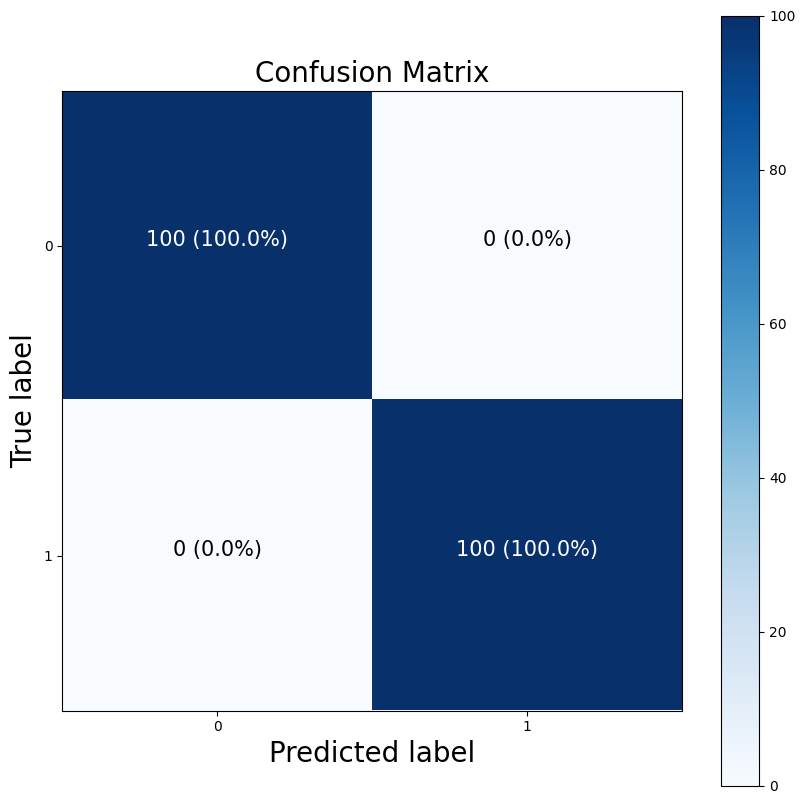

In [95]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Multiclass classification

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

2025-04-06 17:32:15.501119: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

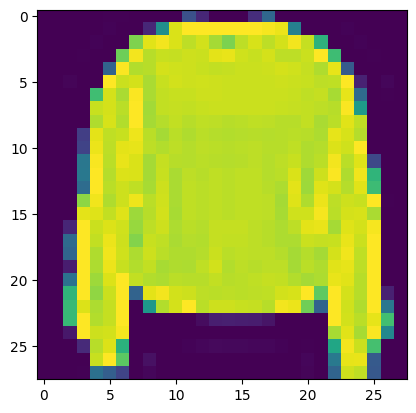

In [5]:
# Plot single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7], )

In [6]:
train_labels[7]

np.uint8(2)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

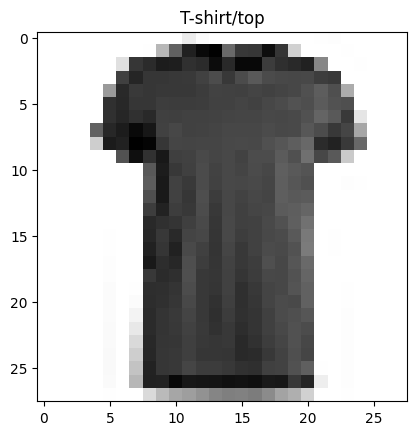

In [8]:
#Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])

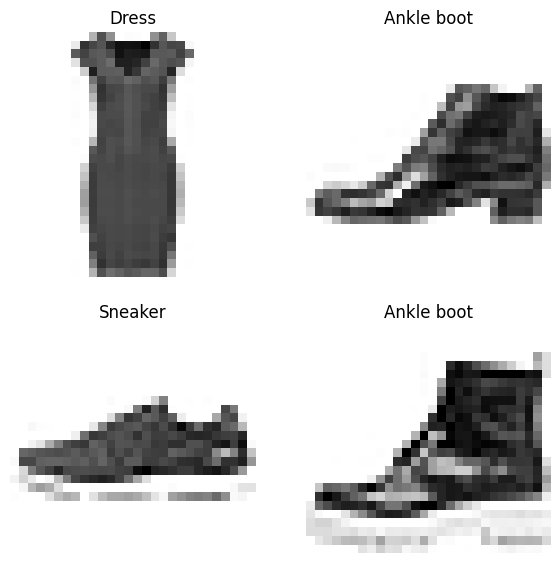

In [9]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

/home/hub/miniconda3/envs/tf-cpu/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1181 - loss: 2.4810 - val_accuracy: 0.1966 - val_loss: 2.0693
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1989 - loss: 2.0064 - val_accuracy: 0.2492 - val_loss: 1.7500
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2612 - loss: 1.7319 - val_accuracy: 0.2540 - val_loss: 1.7021
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2652 - loss: 1.6835 - val_accuracy: 0.3071 - val_loss: 1.6317
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3118 - loss: 1.6074 - val_accuracy: 0.3163 - val_loss: 1.5601
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3235 - loss: 1.5628 - val_accuracy: 0.3262 - val_loss: 1.5372
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3286 - loss: 1.5440 - val_accuracy: 0.3239 - val_loss: 1.5265
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3323 - loss: 1.5300 - 

In [11]:
model_11.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [12]:
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [13]:
#normalize the data
train_data = train_data / 255.0
test_data = test_data / 255.0
train_data.min(), train_data.max()

(np.float64(0.0), np.float64(1.0))

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3301 - loss: 1.8259 - val_accuracy: 0.4971 - val_loss: 1.2585
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5627 - loss: 1.1472 - val_accuracy: 0.6869 - val_loss: 0.8599
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7050 - loss: 0.8066 - val_accuracy: 0.7196 - val_loss: 0.7644
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7263 - loss: 0.7318 - val_accuracy: 0.7388 - val_loss: 0.7226
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7487 - loss: 0.6904 - val_accuracy: 0.7494 - val_loss: 0.6927
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7634 - loss: 0.6583 - val_accuracy: 0.7613 - val_loss: 0.6796
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7715 - loss: 0.6420 - val_accuracy: 0.7746 - val_loss: 0.6710
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7811 - loss: 0.6270 - 

<Axes: title={'center': 'Normalized data'}>

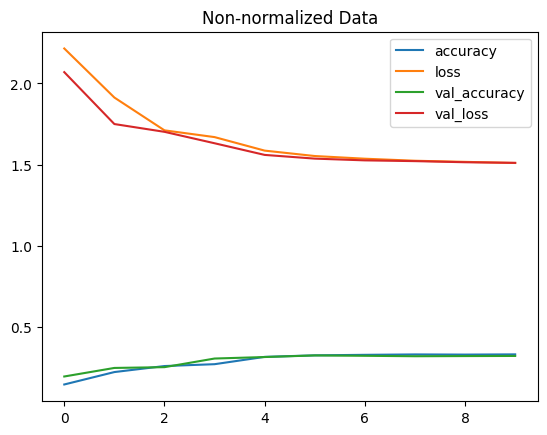

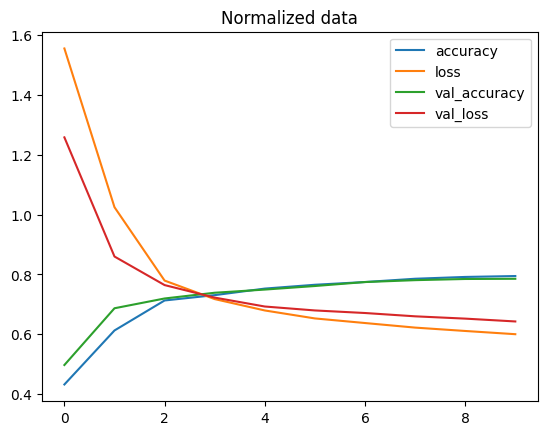

In [15]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [16]:
#set random seed
tf.random.set_seed(42)

#Create a model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),# input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")# output shape is 10, activation is softmax
])

#Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#create the lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

#Fit the model
find_lr_history = model_13.fit(train_data,
                            train_labels,
                            epochs=40,
                            validation_data=(test_data, test_labels),
                            callbacks=[lr_scheduler])


/home/hub/miniconda3/envs/tf-cpu/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4966 - loss: 1.3047 - val_accuracy: 0.7401 - val_loss: 0.7234 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7574 - loss: 0.6757 - val_accuracy: 0.7837 - val_loss: 0.6266 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7961 - loss: 0.5926 - val_accuracy: 0.7971 - val_loss: 0.5958 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8078 - loss: 0.5632 - val_accuracy: 0.8040 - val_loss: 0.5760 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8131 - loss: 0.5463 - val_accuracy: 0.8083 - val_loss: 0.5622 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8178 - loss: 0.5346 - val_accuracy: 0.8120 - val_loss: 0.5507 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8208 - l

Text(0.5, 1.0, 'Finding the ideal learning rate')

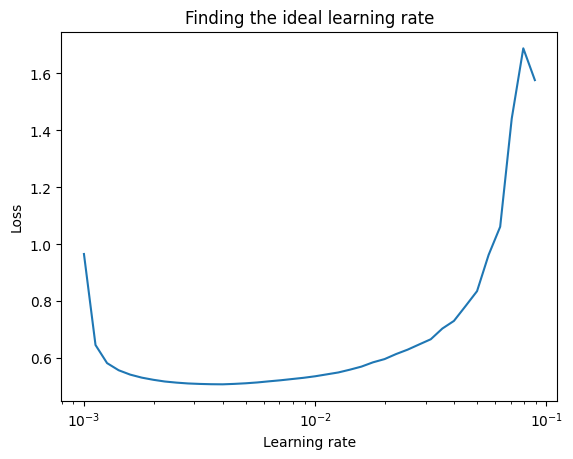

In [18]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [19]:
#set random seed
tf.random.set_seed(42)

#Create a model
model_14= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),# input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")# output shape is 10, activation is softmax
])
#Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])
#Fit the model
history_14 = model_14.fit(train_data,
                            train_labels,
                            epochs=20,
                            validation_data=(test_data, test_labels))

/home/hub/miniconda3/envs/tf-cpu/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5194 - loss: 1.4322 - val_accuracy: 0.7272 - val_loss: 0.7840
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7508 - loss: 0.7305 - val_accuracy: 0.7519 - val_loss: 0.6977
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7671 - loss: 0.6546 - val_accuracy: 0.7673 - val_loss: 0.6698
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7779 - loss: 0.6228 - val_accuracy: 0.7773 - val_loss: 0.6505
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7870 - loss: 0.6028 - val_accuracy: 0.7865 - val_loss: 0.6378
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7935 - loss: 0.5869 - val_accuracy: 0.7896 - val_loss: 0.6267
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7999 - loss: 0.5741 - val_accuracy: 0.7926 - val_loss: 0.6228
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8044 - loss: 0.5639 - 

In [20]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [21]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


array([[1.70361318e-07, 5.19708180e-07, 3.39040860e-18, 2.25786837e-12,
        2.94846748e-13, 2.17280731e-01, 5.99433679e-06, 1.77724540e-01,
        5.81352724e-05, 6.04929924e-01],
       [4.96283360e-02, 2.01374161e-04, 6.86519265e-01, 5.65750524e-03,
        1.09881479e-02, 6.28818013e-03, 2.32273445e-01, 1.83226622e-03,
        6.41486701e-03, 1.96666573e-04],
       [1.11480595e-07, 9.93414104e-01, 2.52350103e-11, 9.52628852e-06,
        1.02630293e-06, 1.30285160e-13, 3.36164412e-08, 3.38160021e-11,
        6.57517696e-03, 5.48061623e-14],
       [3.54333650e-07, 9.99246299e-01, 9.79183609e-11, 7.11030909e-04,
        1.55718462e-05, 9.98993264e-19, 2.97360458e-07, 2.02198393e-13,
        2.66052630e-05, 6.74037903e-16],
       [2.18033805e-01, 1.29064475e-03, 1.39462397e-01, 8.24204907e-02,
        1.35546206e-02, 3.86558968e-05, 5.43204546e-01, 1.36103423e-04,
        1.79675198e-03, 6.20341816e-05]], dtype=float32)

In [22]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(np.int64(9), 'Ankle boot')

In [23]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [24]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[752,   4,  29,  55,   4,   1, 138,   0,  17,   0],
       [  1, 944,   8,  23,   5,   2,   8,   0,   9,   0],
       [ 18,   1, 745,   8, 142,   0,  68,   0,  18,   0],
       [ 63,  39,  26, 747,  30,   1,  81,   0,  13,   0],
       [  0,   1, 137,  22, 725,   0,  97,   0,  18,   0],
       [  2,   0,   0,   0,   0, 895,   1,  49,  18,  35],
       [139,   3, 188,  43, 101,   0, 490,   0,  36,   0],
       [  0,   0,   0,   0,   0,  45,   0, 926,   0,  29],
       [  7,   0,  45,   5,   4,   7,  12,   4, 916,   0],
       [  0,   0,   1,   0,   0,  27,   0,  65,   0, 907]])

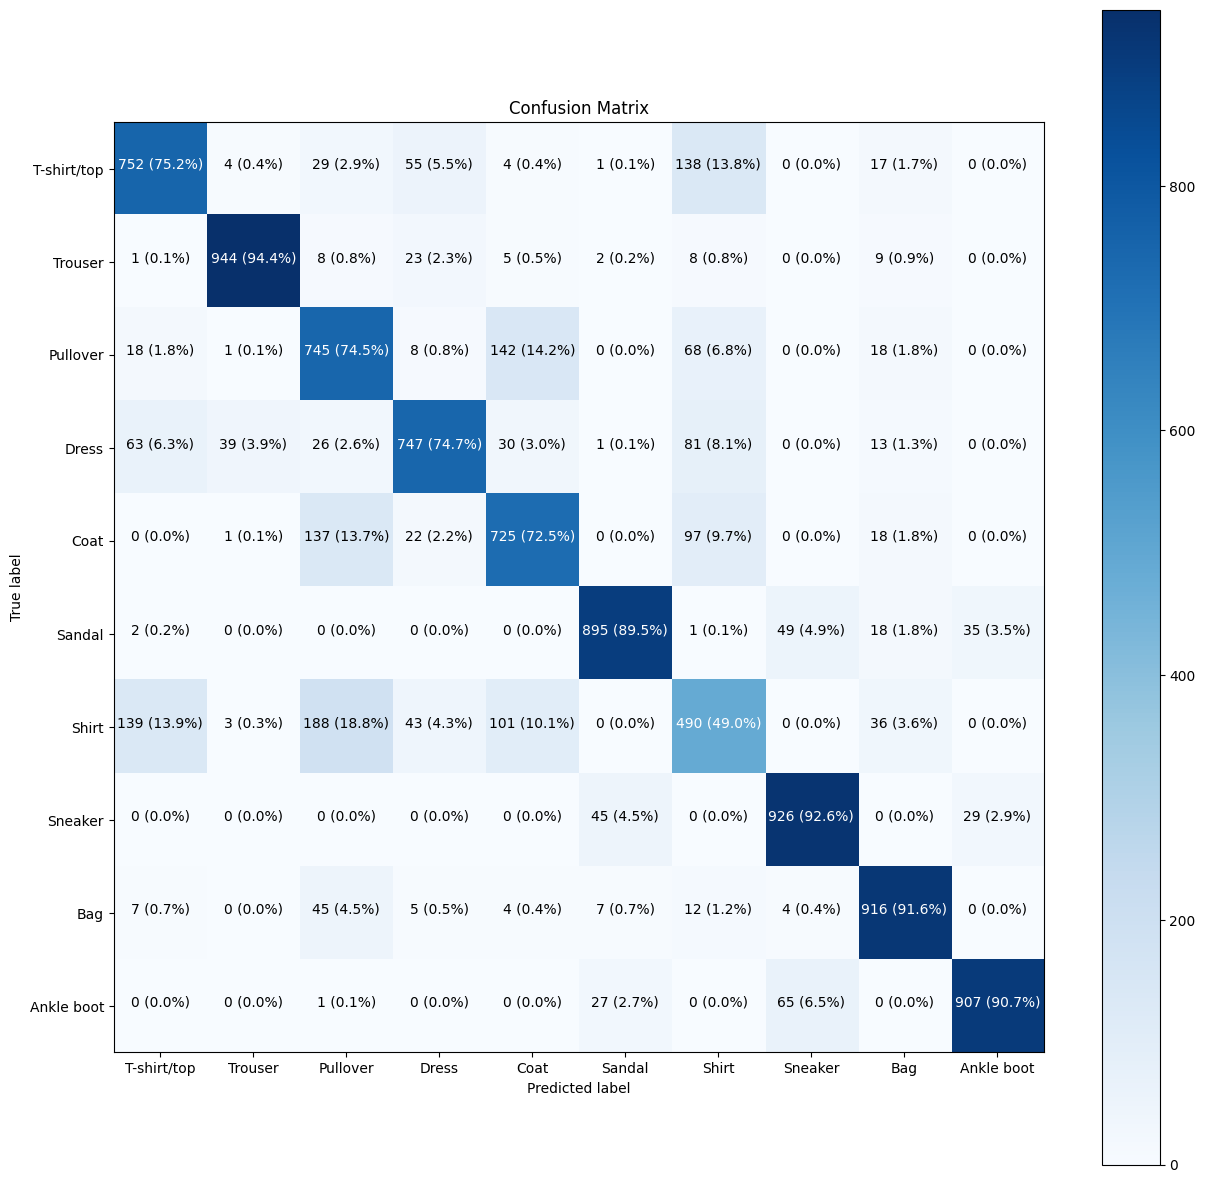

In [25]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [28]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


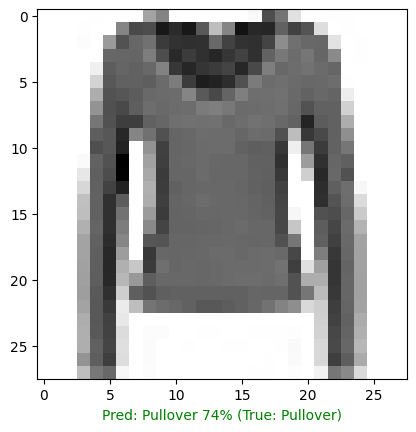

In [39]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [40]:
# Find the layers of our most recent model
model_14.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [42]:
# Extract a particular layer
model_14.layers[1]

<Dense name=dense_9, built=True>

In [43]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.07474762,  0.4150121 , -0.9286504 ,  0.46718886],
        [ 0.7012617 ,  0.2027158 , -0.4146072 ,  0.9147145 ],
        [ 0.72790545,  0.08938384, -1.3624161 , -0.05025292],
        ...,
        [-0.4566128 , -0.06719535, -0.11240158,  0.06132497],
        [ 0.16295384,  0.3695939 , -0.3996321 , -0.30013648],
        [-0.14640135,  0.20826417, -0.6056536 ,  0.19019413]],
       dtype=float32),
 (784, 4))

In [44]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([1.134993 , 1.119625 , 1.1542774, 1.9340789], dtype=float32), (4,))

In [45]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

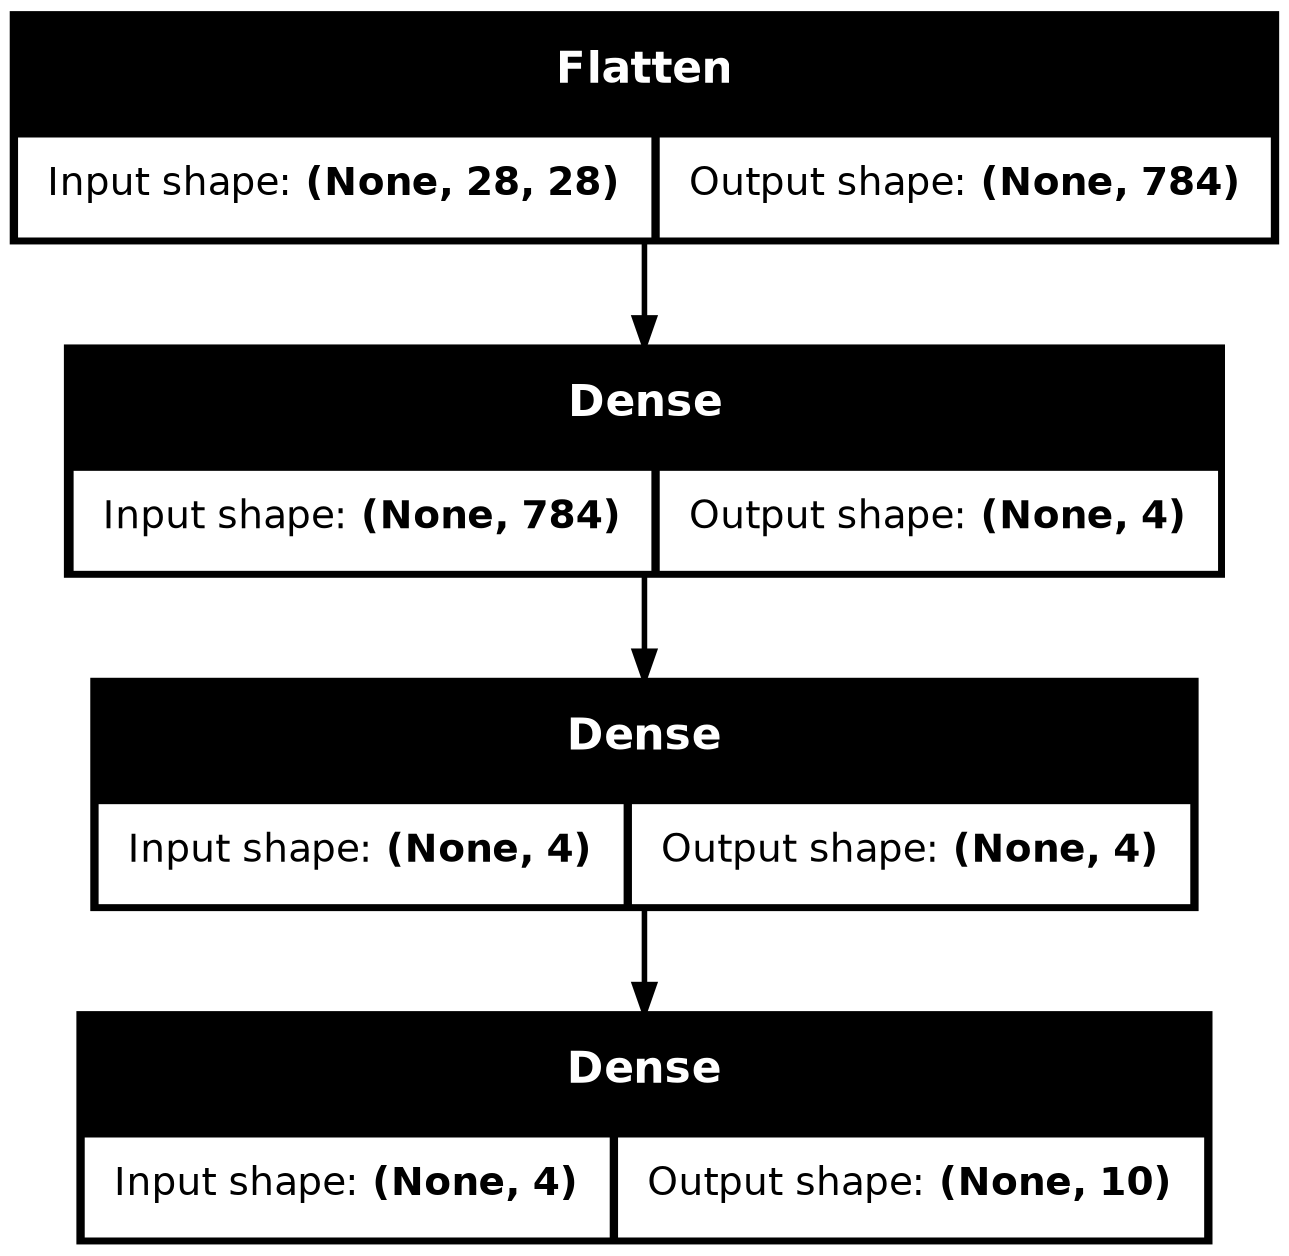

In [46]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)